# Logistic Regression Model Project


DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are tasked with coming up with a policy framework by looking at the data government got from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government.

Attribute Information:
The data Download datacontains characteristics of the people

age: continuous - age of a Person

workclass: Where do a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: This weight is assigned by the Current Population Survey (CPS). People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics - continuous

education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: no. of years a person studied - continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Investment gain of the person other than salary - continuous

capital-loss: Loss from investments - continuous

hours-per-week: No. of hours a person works - continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, 
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, 
France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

In [1]:
#Importing the libraries for data manipulation and visualisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from typing import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score,precision_score, recall_score, f1_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from joblib import Parallel, delayed
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from imblearn.over_sampling import SMOTE
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('who_data.csv')

In [3]:
#To check few rows in the dataset

df.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#To check the random sample of the Data
df.sample(8)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
9893,30,Private,214993,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20652,32,Federal-gov,115066,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K
10001,23,Private,268145,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,<=50K
27595,59,?,145574,Assoc-acdm,12,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,>50K
20456,36,Self-emp-not-inc,36270,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,1977,65,United-States,>50K
24994,52,Private,89041,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
5870,51,Private,320513,7th-8th,4,Married-spouse-absent,Craft-repair,Not-in-family,Black,Male,0,0,50,Dominican-Republic,<=50K
4360,21,Private,30039,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K


In [5]:
#To check the details of the our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

In [6]:
#To check the columns of the Data
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

In [7]:
#Dimension of the Data
df.shape

(32561, 15)

- It shows that the data contains 15 columns and 32561 rows

In [8]:
# To check the data types of each columns in the data
df.dtypes

age                        int64
workclass                 object
fnlwgt                     int64
education                 object
education_no_of_years      int64
marital_status            object
occupation                object
relationship              object
race                      object
sex                       object
capital_gain               int64
capital_loss               int64
working_hours_per_week     int64
native_country            object
salary                    object
dtype: object

In [9]:
#To check for the NaN values

df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

In [10]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_no_of_years,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital_status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#To check for dublicate in the data

df.duplicated().sum()

24

In [12]:
#To remove the duplcates 
df = df.drop_duplicates()

#Optional: Reset the index
df = df.reset_index(drop=True)

In [13]:
#Check the dublicate again

df.duplicated().sum()

0

#### Checking for unique values all through the column

In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

# Age

In [15]:
df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

# Workclass

In [16]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [17]:
df[df['workclass'].str.strip() == "?"] # str.strip is use because of the whitespace in the rows

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32506,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32507,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32515,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32517,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [18]:
#Since the ? is not given the rows will replaced with unknown


df['workclass'] = df['workclass'].str.strip().replace('?', 'unknown')

In [19]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'unknown', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

# Fnlwgt

In [20]:
df['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64)

# Education

In [21]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

# Education_no_of_years

In [22]:
df['education_no_of_years'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

# Marital_status

In [23]:
df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

# Occupation

In [24]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [25]:
df['occupation'].nunique()

15

In [26]:
#To check rows with the '?' in the occupation 

df[df['occupation'].str.strip() == "?"] # str.strip is use because of the whitespace in the rows

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
27,54,unknown,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,unknown,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,unknown,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,unknown,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,unknown,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32506,35,unknown,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32507,30,unknown,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32515,71,unknown,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32517,41,unknown,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [27]:
#Since the ? is not given the rows will replaced with unknown


df['occupation'] = df['occupation'].str.strip().replace('?', 'unknown')

In [28]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'unknown', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [29]:
df['occupation'].nunique()

15

# Relationship

In [30]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

# Race

In [31]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

# Sex

In [32]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

# Capital_gain

In [33]:
df['capital_gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

# Capital_loss

In [34]:
df['capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

# Working_hours_per_week

In [35]:
df['working_hours_per_week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

# Native_country

In [36]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [37]:
df['native_country'].nunique()

42

In [38]:
#To check rows with the '?' in the native country

df[df['native_country'].str.strip() == "?"]

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,unknown,293936,7th-8th,4,Married-spouse-absent,unknown,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32425,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32445,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32468,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32486,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [39]:
df['native_country'].mode()

0     United-States
dtype: object

In [40]:
#Since the ? is not given the rows will replaced with unknown


df['native_country'] = df['native_country'].str.strip().replace('?', 'unknown')

In [41]:
df['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'unknown', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [42]:
df['native_country'].nunique()

42

In [43]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32537 non-null  int64 
 1   workclass               32537 non-null  object
 2   fnlwgt                  32537 non-null  int64 
 3   education               32537 non-null  object
 4   education_no_of_years   32537 non-null  int64 
 5   marital_status          32537 non-null  object
 6   occupation              32537 non-null  object
 7   relationship            32537 non-null  object
 8   race                    32537 non-null  object
 9   sex                     32537 non-null  object
 10  capital_gain            32537 non-null  int64 
 11  capital_loss            32537 non-null  int64 
 12  working_hours_per_week  32537 non-null  int64 
 13  native_country          32537 non-null  object
 14  salary                  32537 non-null  object
dtypes:

# Data visualization

In [45]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

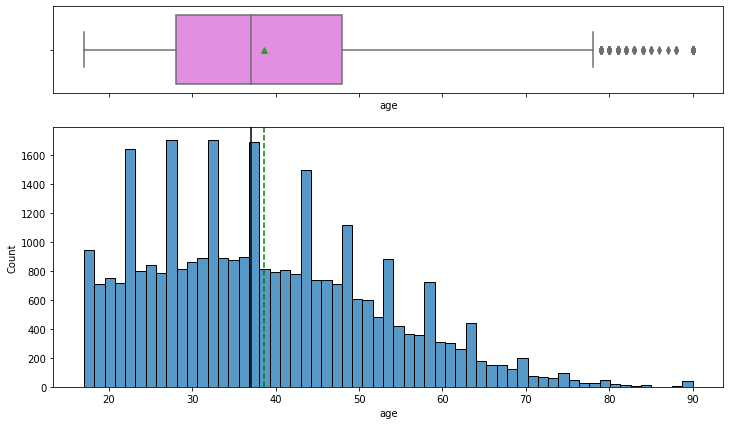

In [46]:
histogram_boxplot(data = df, feature = 'age')

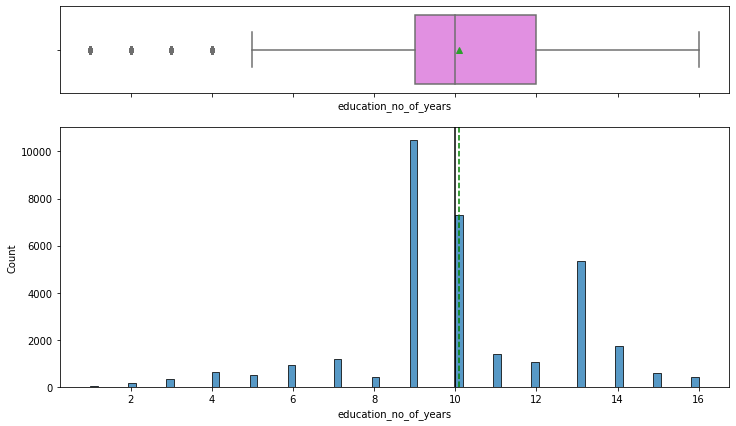

In [47]:
histogram_boxplot(data = df, feature = 'education_no_of_years')

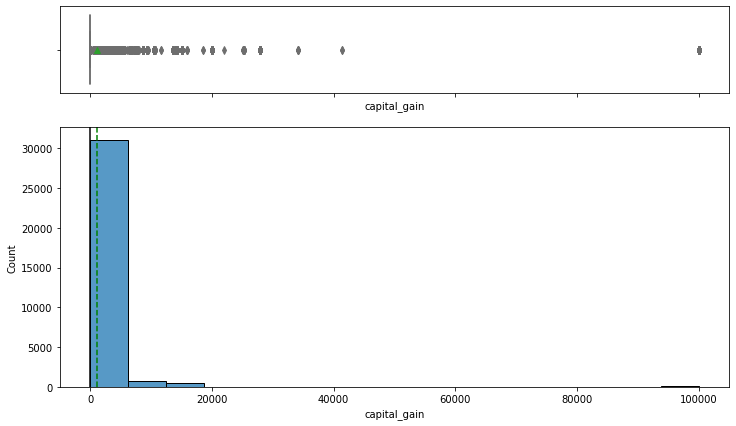

In [48]:
histogram_boxplot(data = df, feature = 'capital_gain')

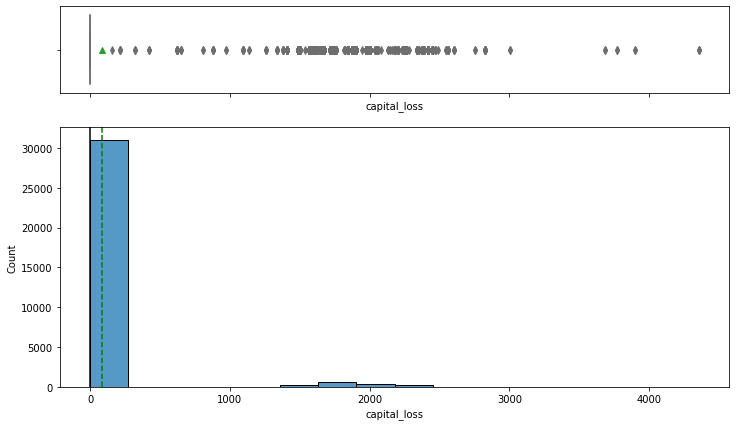

In [49]:
histogram_boxplot(data = df, feature = 'capital_loss')

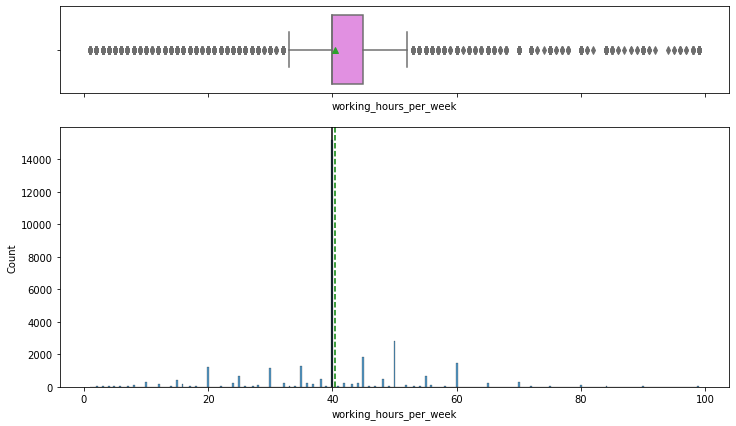

In [50]:
histogram_boxplot(data = df, feature = 'working_hours_per_week')

# Bivaraite Visualization

In [51]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, title = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.show()  # show the plot

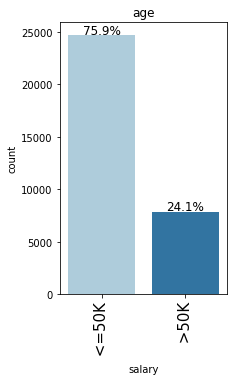

In [52]:
labeled_barplot(data = df, feature = 'salary', perc = True, title = 'age')

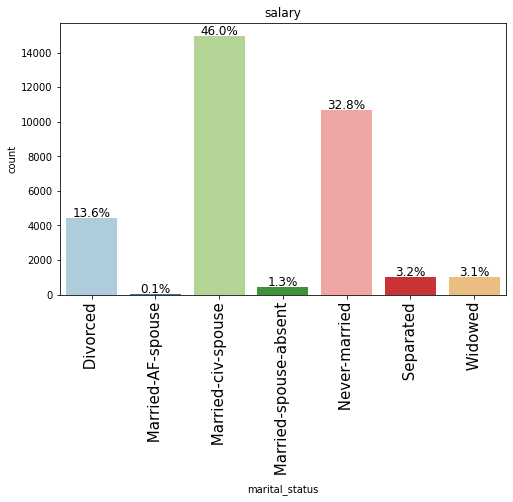

In [53]:
labeled_barplot(data = df, feature = 'marital_status', perc = True, title = 'salary')

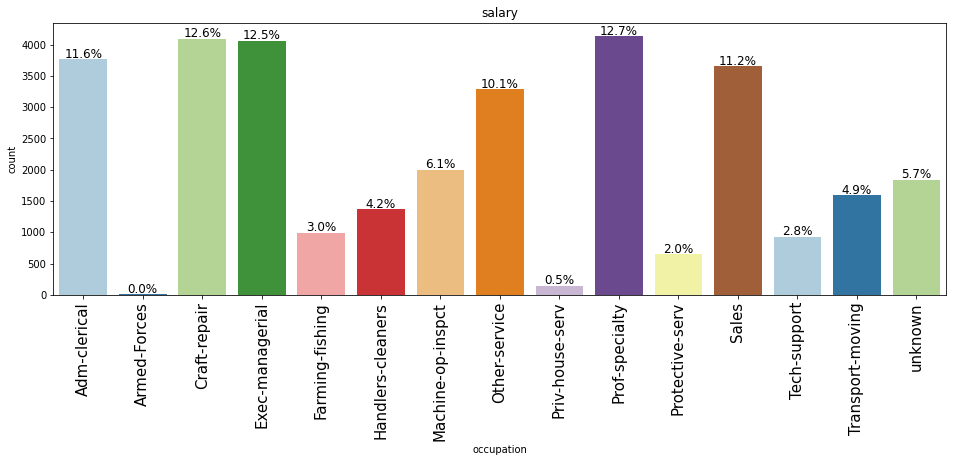

In [54]:
labeled_barplot(data = df, feature = 'occupation', perc = True, title = 'salary')

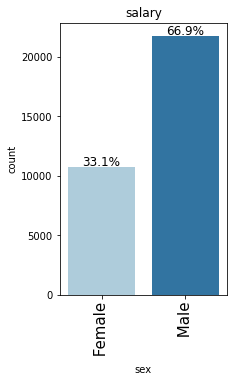

In [55]:
labeled_barplot(data = df, feature = 'sex', perc = True, title = 'salary')

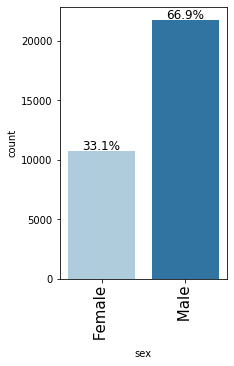

In [56]:
labeled_barplot(data = df, feature = 'sex', perc = True)

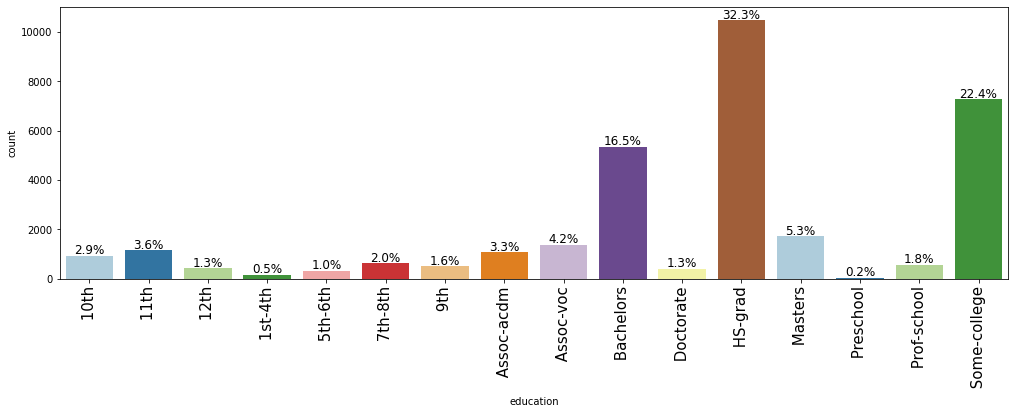

In [57]:
labeled_barplot(data = df, feature = 'education', perc = True)

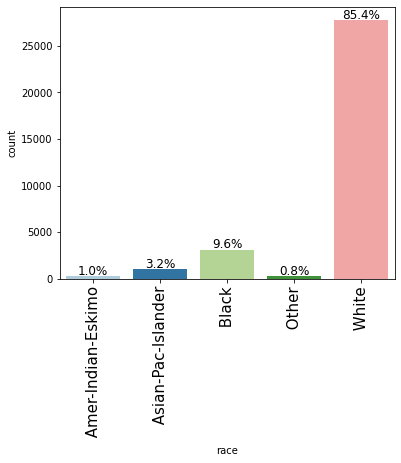

In [58]:
labeled_barplot(data = df, feature = 'race', perc = True)

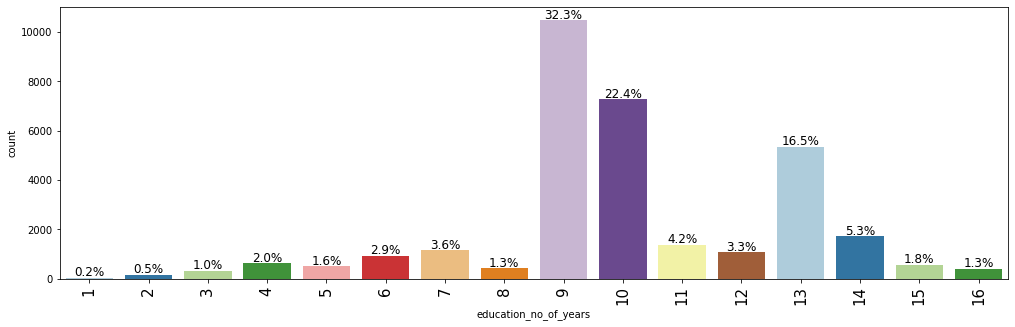

In [59]:
labeled_barplot(data = df, feature = 'education_no_of_years', perc = True)

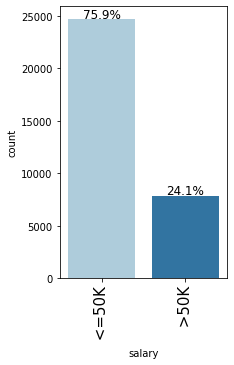

In [60]:
labeled_barplot(data = df, feature = 'salary', perc = True)

# Identifying correlation

In [61]:
df.corr()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education_no_of_years,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital_gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital_loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
working_hours_per_week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


In [62]:
#From the Correlation the target Salary is not among the correlation 
#So the salary will be converted to a numeracal variable

df['salary'] = df['salary'].str.strip()  # Strip leading/trailing spaces

# Check unique values in the 'salary' column
unique_salaries = df['salary'].unique()
print(unique_salaries)

# Update the mapping dictionary based on the unique values
mapping = {'<=50K': 0, '>50K': 1}  # Update with the appropriate values

# Apply the mapping dictionary to the salary column
df['salary_numerical'] = df['salary'].map(mapping)


['<=50K' '>50K']


In [63]:
df['salary_numerical'].unique()

array([0, 1], dtype=int64)

In [64]:
#Removing the categorical salary column

df = df.drop('salary', axis=1)

In [65]:
num_data = df.select_dtypes(include = 'number')

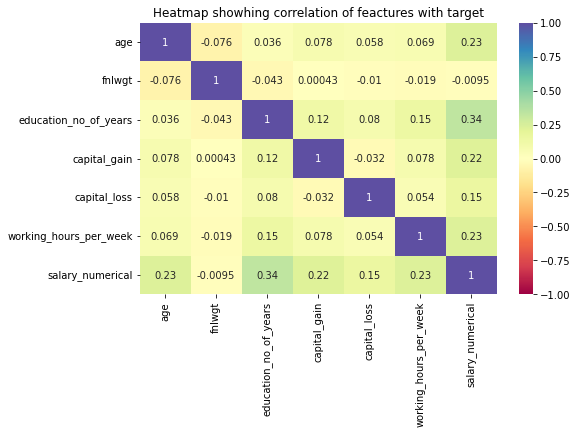

In [66]:
mat_cor = num_data.corr()

plt.figure(figsize = (8, 5))
sns.heatmap(mat_cor, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral')
plt.title('Heatmap showhing correlation of feactures with target');

In [90]:
df

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary_numerical
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [67]:
df.describe()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,salary_numerical
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [70]:
df['salary_numerical'].value_counts(normalize = True)

0    0.759074
1    0.240926
Name: salary_numerical, dtype: float64

# Splitting of the Data

In [69]:
#Slecting the features 

X = df.drop('salary_numerical', axis = 1)
y = df['salary_numerical']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify = y)

#To check the funtion of the stratify if the test and traing is the same
which is to maintain the categorical target in both training and testing

In [76]:
y.value_counts(normalize = True)

0    0.759074
1    0.240926
Name: salary_numerical, dtype: float64

In [77]:
y_train.value_counts(normalize = True)

0    0.759076
1    0.240924
Name: salary_numerical, dtype: float64

In [79]:
y_test.value_counts(normalize = True)

0    0.759066
1    0.240934
Name: salary_numerical, dtype: float64

In [96]:
df.dtypes

age                        int64
workclass                 object
fnlwgt                     int64
education                 object
education_no_of_years      int64
marital_status            object
occupation                object
relationship              object
race                      object
sex                       object
capital_gain               int64
capital_loss               int64
working_hours_per_week     int64
native_country            object
salary_numerical           int64
dtype: object

# Logistic Regression

In [99]:
# # encode categorical variables with one-hot encoding

# import category_encoders as e

# encoder = e.OneHotEncoder(X)

# x_train = encoder.fit_transform(x_train)

# x_test = encoder.transform(x_test)

In [100]:
#To normalize the data

scaler = MinMaxScaler() # convert data to have a mean of zero and  SDT 1

x_train_sd = scaler.fit_transform(x_train) # fit calculate the mean & SDT of each of the variable. transform use cal mean and STD to transform our data 
x_test_sd = scaler.transform(x_test)

In [101]:
x_train_sd

array([[0.4109589 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32876712, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.56164384, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.23287671, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04109589, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02739726, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [102]:
x_test_sd

array([[0.31506849, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2739726 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28767123, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.46575342, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01369863, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32876712, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Building of the model

In [107]:
#Build the model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0)
                             #class_weight={1:0.9, 0:0.1})

log_reg.fit(x_train_sd, y_train)

LogisticRegression(random_state=0)

In [109]:
log_reg.score(x_train_sd, y_train)

0.8502439586614929

In [110]:
log_reg.predict_proba(x_test_sd)

array([[0.94652875, 0.05347125],
       [0.67071698, 0.32928302],
       [0.24326772, 0.75673228],
       ...,
       [0.67846329, 0.32153671],
       [0.99276595, 0.00723405],
       [0.92912521, 0.07087479]])

# Model performance check

In [105]:
#Function to compute different metrics to check performance of regression model

def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)

    # compute accuracy, recall, precision, and F1 score
    acc = accuracy_score(target, pred_class)
    recall = recall_score(target, pred_class, average="weighted")
    precision = precision_score(target, pred_class, average="weighted",zero_division=0)
    f1 = f1_score(target, pred_class, average="weighted")

    # create a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],
    )

    # create a confusion matrix
    conf = confusion_matrix(target, pred_class)

    # plot the confusion matrix with color-coded sections
    plt.figure(figsize=(8, 5))
    sns.heatmap(
        conf,
        annot=True,
        fmt="g",
        cmap=sns.color_palette("Blues", as_cmap=True),
        cbar=False,
    )
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.title("Confusion Matrix", fontweight="bold")
    plt.show()

    return df_perf


# Confusion Matrix

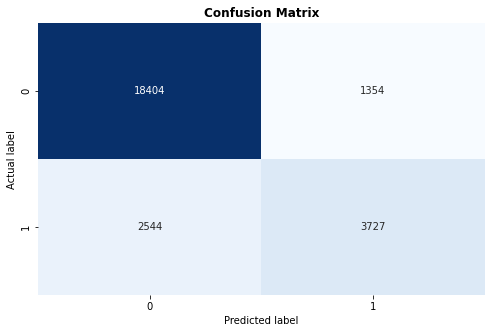

,Accuracy,Recall,Precision,F1-score
0,0.850244,0.850244,0.843613,0.844584


In [111]:
log_reg_train = model_performance_classification(log_reg, x_train_sd, y_train)

log_reg_train

If a new data is given similarly as the one that was used to train the model 85% of the times the model will predict that
the people recieve more that 50k as salary

from our data <=50k=0 and >50k=1

so from the confusion matrix it predicting that 18404 is recieving greater than or equal to 50k and 3727 is recieving less than 50k
Also the it is wrongly predicting that 1354 is recieving greater than or equal to 50k and 2544 is recieving less than 50k

TN = 18404
TP = 3727
FP = 1354
FN = 2544

These metrics indicate how well the model performed in predicting the positive class (earning above 50K) compared to the actual values. An accuracy of 85.0% suggests that 85.0% of the predictions were correct overall. The recall of 85.0% indicates that the model correctly identified 85.0% of the individuals who were actually earning above 50K. The precision of 84.4% signifies that out of the predicted positive cases, 84.4% were actually true positives. The F1-score of 84.5% is a balanced measure that combines both precision and recall.

These metrics collectively provide an assessment of the model's performance in terms of accuracy, completeness, and precision in predicting the positive class.